In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/Users/admin/git_projects/football/data_collection/serie_a.csv")

df = (
    df
    .assign(Date=pd.to_datetime(df['Date'], dayfirst=True),
           TG=df['FTHG'] + df['FTAG'])
    .dropna(subset=['HomeTeam'])
)

columns = list(df.columns)

last_column = columns.pop(-1)

columns.insert(4, last_column)

df = df[columns]



/var/folders/cz/tsrtpglj4x3fc4dskw2pnjrc0000gn/T/ipykernel_940/2861945548.py:1: DtypeWarning: Columns (52,101) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/git_projects/football/data_collection/serie_a.csv")


In [21]:
df


,Div,Date,HomeTeam,AwayTeam,TG,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,serie_a,2003-08-30,Reggina,Sampdoria,4.0,2.0,2.0,D,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,serie_a,2003-08-31,Bologna,Parma,4.0,2.0,2.0,D,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,serie_a,2003-08-31,Brescia,Chievo,2.0,1.0,1.0,D,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,serie_a,2003-08-31,Inter,Modena,2.0,2.0,0.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,serie_a,2003-08-31,Juventus,Empoli,6.0,5.0,1.0,H,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,serie_a,2021-05-23,Bologna,Juventus,5.0,1.0,4.0,A,0.0,3.0,...,3.10,1.75,2.02,1.91,2.03,1.88,2.14,1.93,2.00,1.87
6575,serie_a,2021-05-23,Napoli,Verona,2.0,1.0,1.0,D,0.0,0.0,...,3.15,-1.75,2.06,1.87,2.03,1.88,2.09,2.01,1.98,1.89
6576,serie_a,2021-05-23,Sassuolo,Lazio,2.0,2.0,0.0,H,1.0,0.0,...,2.84,-0.75,1.97,1.96,1.96,1.96,1.99,1.97,1.94,1.93
6577,serie_a,2021-05-23,Spezia,Roma,4.0,2.0,2.0,D,2.0,0.0,...,3.35,1.00,1.87,2.06,1.83,2.08,2.05,2.09,1.91,1.95


In [22]:
df = df.iloc[:,:65]
df.head()

,Div,Date,HomeTeam,AwayTeam,TG,FTHG,FTAG,FTR,HTHG,HTAG,...,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR
0,serie_a,2003-08-30,Reggina,Sampdoria,4.0,2.0,2.0,D,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,serie_a,2003-08-31,Bologna,Parma,4.0,2.0,2.0,D,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,serie_a,2003-08-31,Brescia,Chievo,2.0,1.0,1.0,D,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,serie_a,2003-08-31,Inter,Modena,2.0,2.0,0.0,H,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,serie_a,2003-08-31,Juventus,Empoli,6.0,5.0,1.0,H,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='TG', ylabel='Density'>

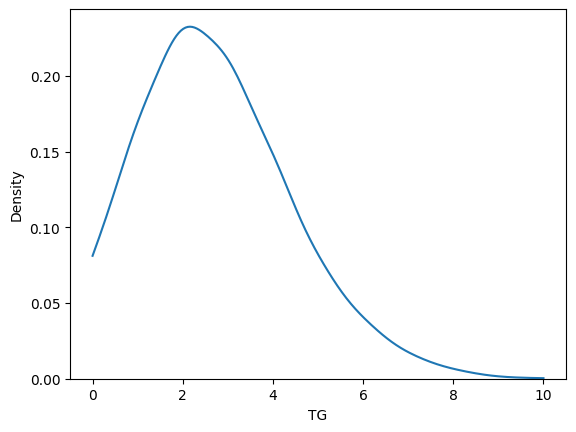

In [23]:
sns.kdeplot(data=df, x=df['TG'], cut=0, bw_adjust=2)